# ML Exercise 2-3
## Question 3
By Gholamreza Dar

https://gholamrezadar.ir/

Nov 2021


Questions available at : [Github Link](https://github.com/Gholamrezadar/machine-learning-exercises/blob/main/ML-HW02.pdf)


How to Run:
Runtime > Run all(ctrl+f9)

## Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris

# use seaborn
sns.set()

# Load the data using pandas
X, y= load_iris(return_X_y=True, as_frame=True)
df = X.copy()
df["class"] = y
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Helper functions

### Distance function

In [ ]:
def distance(a,b):
  # Euclidean distance
  return np.linalg.norm((a-b), axis=1)

In [ ]:
# testing the distance function
distance(np.array([[2,2,1],
                   [2,1,1],
                   [2,2,1]]),
         np.array([1,1,1]))

array([1.41421356, 1.        , 1.41421356])

### KNN Function

In [ ]:
def KNN(X_train, y_train, X_test, y_test, k=3):
  # 1. Train loss
  train_confusion_matrix = [[0,0,0],
                            [0,0,0],
                            [0,0,0]]
  train_wrong = 0
  train_correct = 0
  for i in range(len(X_train)):
    temp_df_i = X_train.copy()
    
    # calculate the distance of every point in training set to point i in "training" set
    temp_df_i["distance_to_i"] = distance(X_train.iloc[i].to_numpy(), temp_df_i.to_numpy())
    # sort distances from low to high
    temp_df_i.sort_values(by="distance_to_i", inplace=True)
    # select k nearest neighbors
    nearest_neighbors = temp_df_i.iloc[1:k+1].index.values
    # find nearest neighbors classes
    nearest_neighbors_classes = (y_train.loc[nearest_neighbors].values)
    # predict (most common class amongst neighbors)
    predicted_class = np.bincount(nearest_neighbors_classes).argmax()
    # check if the prediction was correct
    if predicted_class != y_train.iloc[i]:
      train_wrong+=1
      train_confusion_matrix[y_train.iloc[i]][predicted_class] +=1
    else:
      train_correct+=1
      train_confusion_matrix[predicted_class][predicted_class] +=1

  # 2. Test loss
  test_confusion_matrix = [[0,0,0],
                           [0,0,0],
                           [0,0,0]]
  test_wrong = 0
  test_correct = 0
  temp_df_i = X_train.copy()
  for i in range(len(X_test)):
    temp_df_i = X_train.copy()

    # calculate the distance of every point in training set to point i in "test" set
    temp_df_i["distance_to_i"] = distance(X_test.iloc[i].to_numpy(), temp_df_i.to_numpy())
    # sort distances from low to high
    temp_df_i.sort_values(by="distance_to_i", inplace=True)
    # select k nearest neighbors
    nearest_neighbors = temp_df_i.iloc[1:k+1].index.values
    # find nearest neighbors classes
    nearest_neighbors_classes = (y_train.loc[nearest_neighbors].values)
    # predict (most common class amongst neighbors)
    predicted_class = np.bincount(nearest_neighbors_classes).argmax()
    # check if the prediction was correct
    if predicted_class != y_test.iloc[i]:
      test_wrong+=1
      test_confusion_matrix[y_test.iloc[i]][predicted_class] +=1
    else:
      test_correct+=1
      test_confusion_matrix[predicted_class][predicted_class] +=1
      

  # return data about classification
  return train_wrong, train_correct, test_wrong, test_correct, train_confusion_matrix, test_confusion_matrix

## Our KNN

In [ ]:
from sklearn.model_selection import KFold

# Kfold with k=10
kf = KFold(n_splits = 10, shuffle = True, random_state = 1)
splitted_df = kf.split(df)

In [ ]:
def add_confusion_matrices(a,b):
  for i in range(len(a)):
    for j in range(len(a[0])):
      a[i][j] += b[i][j]

In [ ]:
avg_test_wrongs_history = {}
avg_train_wrongs_history = {}

# Choosing the best K
for k in range(1,50):
  train_losses = []
  test_losses = []

  print("k =",k)
  print("test_wrongs :", end=" ")

  # 10 fold cross validation
  splitted_df = kf.split(df)
  for train_index, test_index in splitted_df:
    train_df = df.iloc[train_index]
    test_df =  df.iloc[test_index]

    y_train = train_df["class"]
    X_train = train_df.drop(columns=["class"])

    y_test = test_df["class"]
    X_test = test_df.drop(columns=["class"])

    # KNN
    train_wrong, train_correct, test_wrong, test_correct, train_confusion_matrix, test_confusion_matrix = KNN(X_train, y_train, X_test, y_test, k=k)

    # save training loss and test loss
    train_losses.append(train_wrong/(train_wrong+train_correct))
    test_losses.append(test_wrong/(test_wrong+test_correct))

    # debug/progress
    print(test_wrong, end=", ")
  print()

  # saving wrongs for later
  avg_train_wrongs_history[k] = sum(train_losses)/len(train_losses)
  avg_test_wrongs_history[k] = sum(test_losses)/len(test_losses)
  
  
  print("train loss =", round(avg_train_wrongs_history[k], 4))
  print("test loss =", round(avg_test_wrongs_history[k], 4))
  print()


k = 1
test_wrongs : 0, 0, 1, 0, 0, 1, 0, 2, 0, 3, 
train loss = 0.0407
test loss = 0.0467

k = 2
test_wrongs : 0, 0, 1, 0, 3, 1, 0, 2, 0, 1, 
train loss = 0.0533
test loss = 0.0533

k = 3
test_wrongs : 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 
train loss = 0.0385
test loss = 0.04

k = 4
test_wrongs : 0, 1, 1, 0, 3, 1, 0, 1, 0, 1, 
train loss = 0.04
test loss = 0.0533

k = 5
test_wrongs : 0, 1, 0, 0, 2, 1, 0, 2, 0, 2, 
train loss = 0.0356
test loss = 0.0533

k = 6
test_wrongs : 0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 
train loss = 0.0393
test loss = 0.04

k = 7
test_wrongs : 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 
train loss = 0.0333
test loss = 0.04

k = 8
test_wrongs : 0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 
train loss = 0.0356
test loss = 0.04

k = 9
test_wrongs : 0, 1, 0, 0, 3, 1, 0, 1, 0, 0, 
train loss = 0.0333
test loss = 0.04

k = 10
test_wrongs : 0, 1, 0, 1, 3, 1, 0, 1, 0, 0, 
train loss = 0.0341
test loss = 0.0467

k = 11
test_wrongs : 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 
train loss = 0.0311
test loss = 0.04

k = 12
test

### Plotting losses

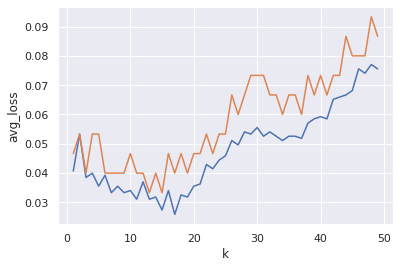

In [ ]:
train_loss_df = pd.DataFrame({"k":list(avg_train_wrongs_history.keys()),
                        "avg_loss":list(avg_train_wrongs_history.values())})
test_loss_df = pd.DataFrame({"k":list(avg_test_wrongs_history.keys()),
                        "avg_loss":list(avg_test_wrongs_history.values())})
sns.lineplot(data=train_loss_df, x="k", y="avg_loss")
sns.lineplot(data=test_loss_df, x="k", y="avg_loss")

### Top K values

In [ ]:
best_k_list = list(sorted(avg_test_wrongs_history.items(), key=lambda x:x[1]))[:5]
print("Top performing k:")
print("K\t Loss")
for k,loss in best_k_list:
  print(k,"\t", loss)

Top performing k:
K	 Loss
13 	 0.03333333333333333
15 	 0.03333333333333333
6 	 0.039999999999999994
7 	 0.039999999999999994
8 	 0.039999999999999994


## Sklearn KNN (for comparison)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_avg_train_loss_history = {}
sklearn_avg_test_loss_history = {}

for k in range(2, 50):
  neigh = KNeighborsClassifier(n_neighbors=k)

  train_losses = []
  test_losses = []

  splitted_df = kf.split(df)
  for train_index, test_index in splitted_df:
    train_df = df.iloc[train_index]
    test_df =  df.iloc[test_index]

    y_train = train_df["class"]
    X_train = train_df.drop(columns=["class"])

    y_test = test_df["class"]
    X_test = test_df.drop(columns=["class"])

    # KNN
    neigh.fit(X_train, y_train)

    # save training loss and test loss
    train_losses.append(1.0 - neigh.score(X_train, y_train))
    test_losses.append(1.0 - neigh.score(X_test, y_test))

  sklearn_avg_train_loss_history[k] = sum(train_losses)/len(train_losses)
  sklearn_avg_test_loss_history[k] = sum(test_losses)/len(test_losses)

### Plotting losses

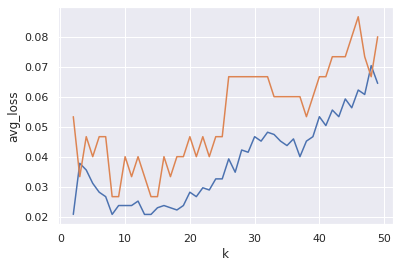

In [ ]:
train_loss_df = pd.DataFrame({"k":list(sklearn_avg_train_loss_history.keys()),
                        "avg_loss":list(sklearn_avg_train_loss_history.values())})
test_loss_df = pd.DataFrame({"k":list(sklearn_avg_test_loss_history.keys()),
                        "avg_loss":list(sklearn_avg_test_loss_history.values())})

sns.lineplot(data=train_loss_df, x="k", y="avg_loss")
sns.lineplot(data=test_loss_df, x="k", y="avg_loss")

### Top K values

In [ ]:
best_k_list = list(sorted(sklearn_avg_test_loss_history.items(), key=lambda x:x[1]))[:5]
print("Top performing k:")
print("K\t Loss")
for k,loss in best_k_list:
  print(k,"\t", loss)

Top performing k:
K	 Loss
8 	 0.02666666666666666
9 	 0.02666666666666666
14 	 0.02666666666666666
15 	 0.02666666666666666
3 	 0.033333333333333326


## confusion matrix for k=13

In [ ]:
# KNN
(train_wrong,
train_correct,
test_wrong, 
test_correct, 
train_confusion_matrix, 
test_confusion_matrix) = KNN(X_train,
                            y_train,
                            X_test,
                            y_test,
                            k=13)

In [ ]:
print("Train Confusion Matrix")
print("    0  1  2")
[print(str(i)+" "+str(row)) for i,row in enumerate(train_confusion_matrix) ]
print()

print("Test Confusion Matrix")
print("   0  1  2")
[print(str(i)+" "+str(row)) for i,row in enumerate(test_confusion_matrix) ]
print(end='')

Train Confusion Matrix
    0  1  2
0 [47, 0, 0]
1 [0, 42, 2]
2 [0, 3, 41]

Test Confusion Matrix
   0  1  2
0 [3, 0, 0]
1 [0, 6, 0]
2 [0, 0, 6]


Thanks for reading.
if you have any questions:
* gholamrezadar@gmail.com
* instagram : @gholamreza_dar
* telegram  : @gholamrezadar